In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

### Constants

In [3]:
N = 5
k1 = 1
k2 = 20
omega = 1

### States

In [4]:
psi = fock(N, 0)
psi2 = fock(N, N - 1)

psi3 = (psi + psi2).unit()

In [5]:
rho2 = fock_dm(N,1).unit()
rho2

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

In [6]:
wigner_rep = wigner(rho2, np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
wigner_rep

array([[0.00160172, 0.00183951, 0.00210567, ..., 0.00210567, 0.00183951,
        0.00160172],
       [0.00183951, 0.0021116 , 0.00241595, ..., 0.00241595, 0.0021116 ,
        0.00183951],
       [0.00210567, 0.00241595, 0.0027628 , ..., 0.0027628 , 0.00241595,
        0.00210567],
       ...,
       [0.00210567, 0.00241595, 0.0027628 , ..., 0.0027628 , 0.00241595,
        0.00210567],
       [0.00183951, 0.0021116 , 0.00241595, ..., 0.00241595, 0.0021116 ,
        0.00183951],
       [0.00160172, 0.00183951, 0.00210567, ..., 0.00210567, 0.00183951,
        0.00160172]])

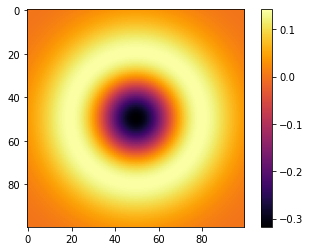

In [7]:
plt.imshow(wigner_rep, 'inferno')
plt.colorbar()

### QHO Operators

In [8]:
a = create(N)
adag = destroy(N)

### Operators for Dynamics
Natural units so set $\hbar = 1$

In [9]:
H = omega * adag * a

gain = k1 * lindblad_dissipator(adag)
loss = k2 * lindblad_dissipator(a**2)

### Simulation

In [10]:
times = np.linspace(0.0, 10.0, 10)
result = mesolve(H, psi, times, [gain, loss])

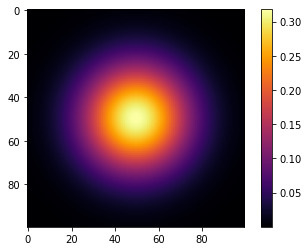

In [11]:
wigner_rep = wigner(result.states[0], np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

plt.imshow(wigner_rep, 'inferno')
plt.colorbar()

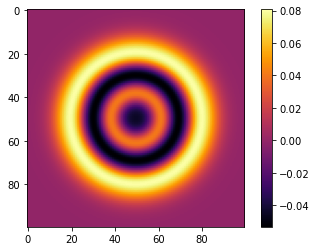

In [17]:
wigner_rep = wigner(result.states[-1], np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))

plt.imshow(wigner_rep, 'inferno')
plt.colorbar()